###  MicroGrad demo

In [100]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [101]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [102]:
np.random.seed(1337)
random.seed(1337)

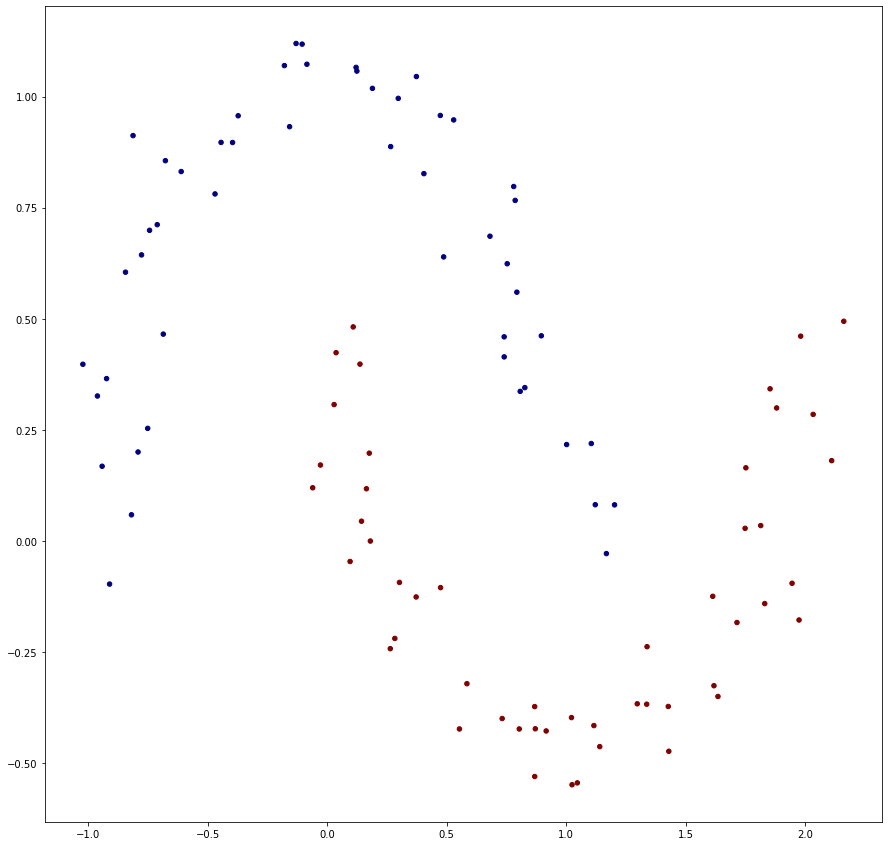

In [103]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(15,15))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [104]:
# initialize a model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(16)]]
number of parameters 337


In [105]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=0.8958441028683222, grad=0) 0.5


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


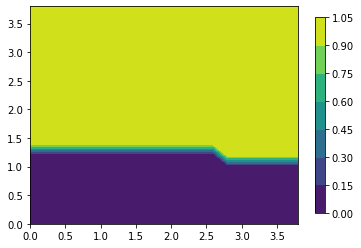

In [106]:
h = 0.2
xx, yy = np.meshgrid(np.arange(0, 4, h),
                         np.arange(0, 4, h))

Xmesh = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([1 if i > len(Xmesh)//3 else 0 for i in range(len(Xmesh))])
Z = Z.reshape(xx.shape)
print(Z)
fig = plt.figure()
fig = plt.contourf(xx, yy, Z)
plt.colorbar(fig, shrink=0.9)
plt.show()

In [107]:
def visualize(X, y):
    # visualize decision boundary
    h = 0.3
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Xmesh = np.c_[xx.ravel(), yy.ravel()]
    inputs = [list(map(Value, xrow)) for xrow in Xmesh]
    scores = list(map(model, inputs))
    #Z = np.array([s.data > 0 for s in scores])
    Z = np.array([s.data for s in scores])
    Z = Z.reshape(xx.shape)
    
    
    fig = plt.figure(figsize=(10, 10))
    fig = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.colorbar(fig)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()
    
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')

    # Data for a three-dimensional line
    fig = ax.plot_surface(xx, yy, Z, cmap=cm.coolwarm, alpha=0.5)
    ax.scatter3D(X[:, 0], X[:, 1], c=y, alpha=1)
    plt.colorbar(fig, shrink=0.8)

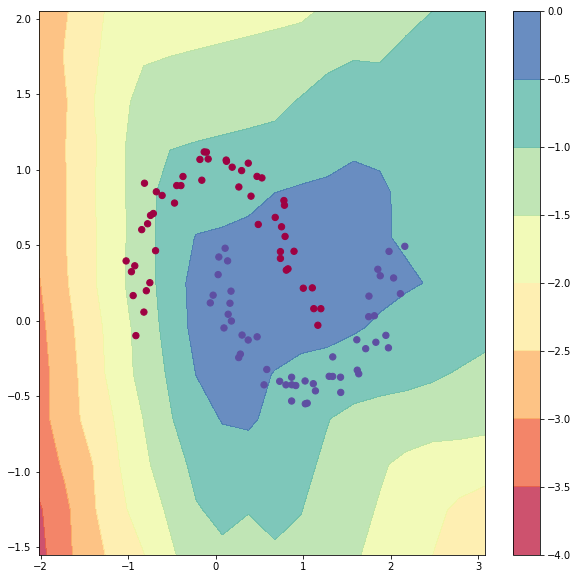

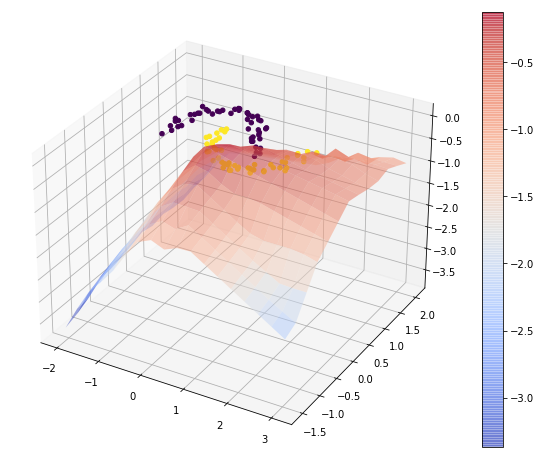

In [108]:
visualize(X, y)

step 0 loss 0.8958441028683222, accuracy 50.0%


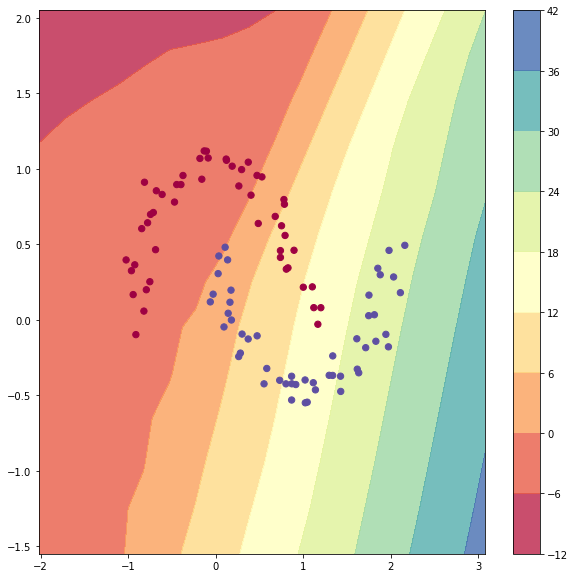

step 10 loss 0.24486582482919028, accuracy 91.0%


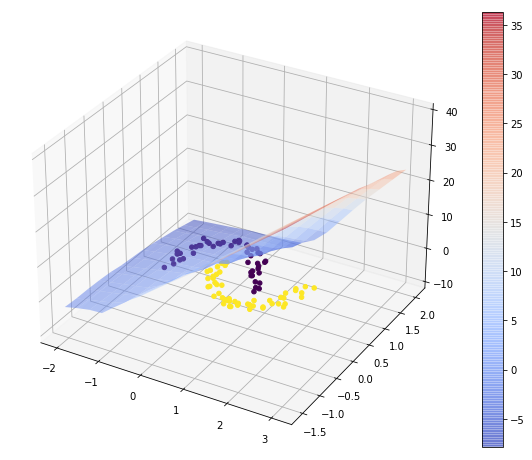

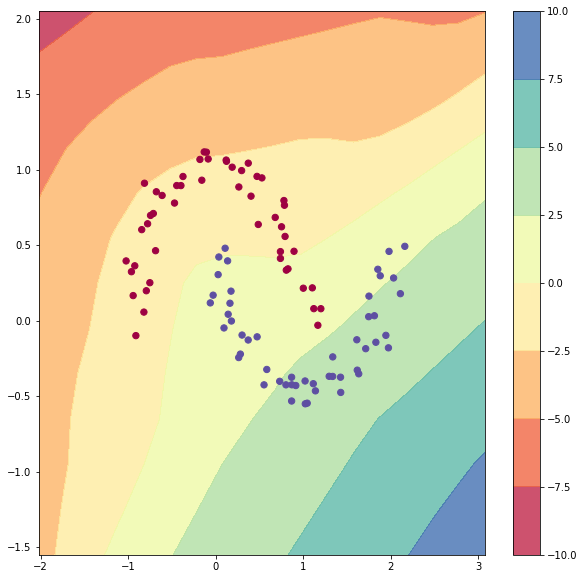

step 20 loss 0.15127195556906703, accuracy 93.0%


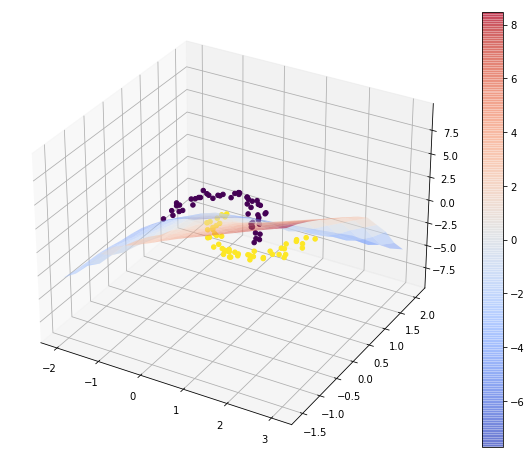

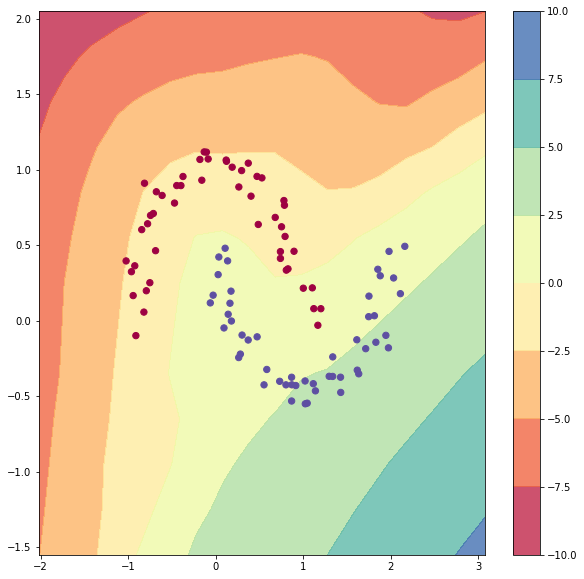

step 30 loss 0.21257192399474634, accuracy 93.0%


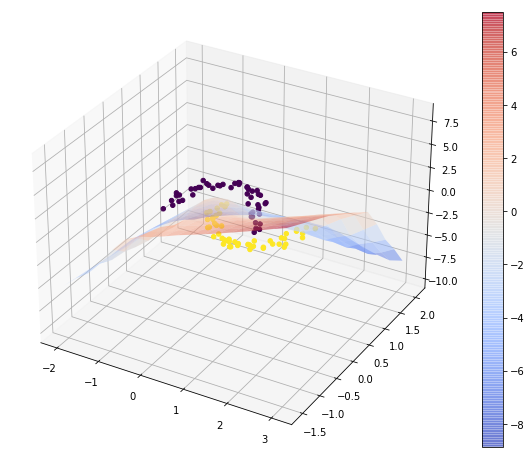

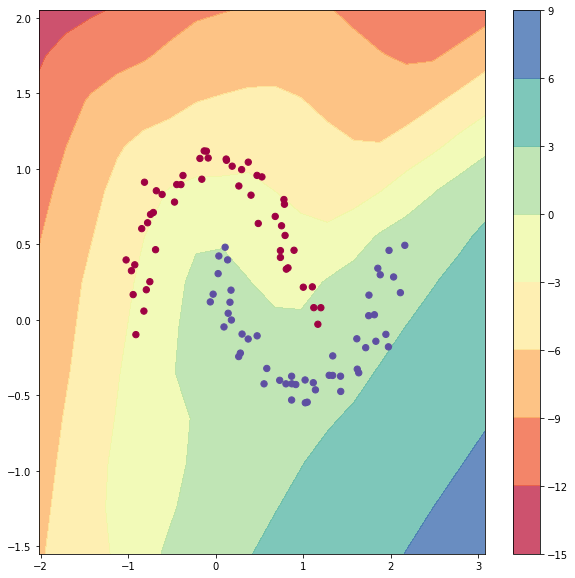

step 40 loss 0.07483793063587511, accuracy 97.0%


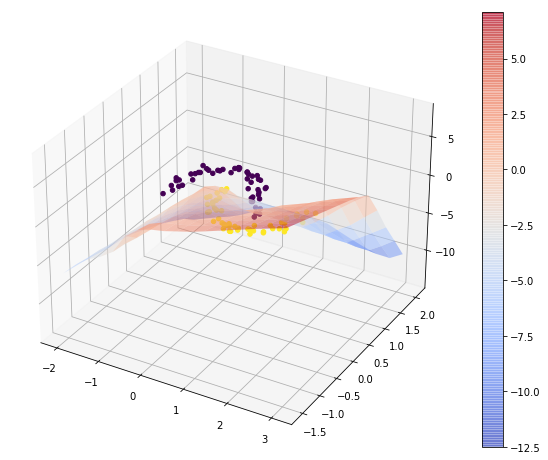

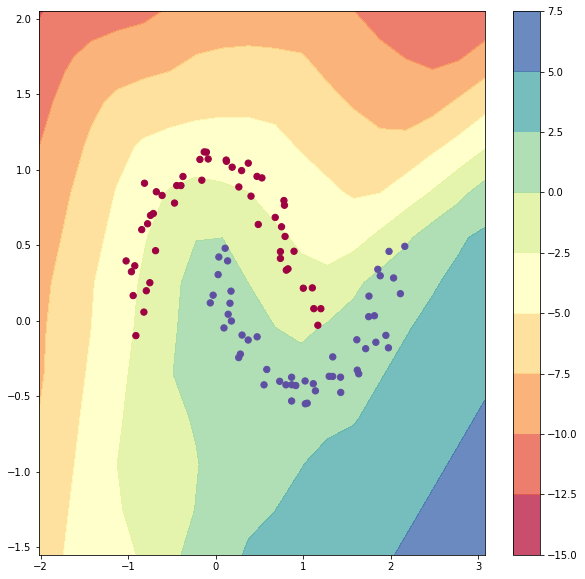

step 50 loss 0.20194752112166503, accuracy 93.0%


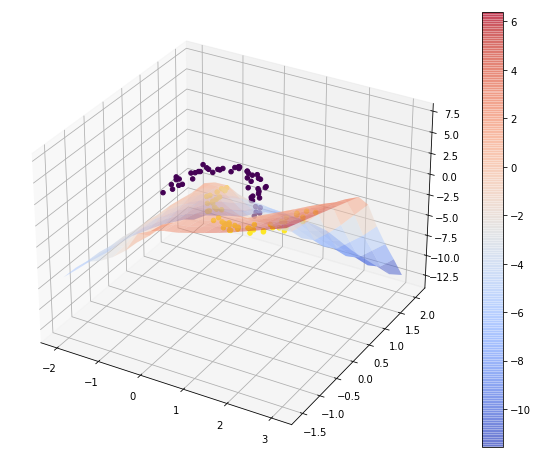

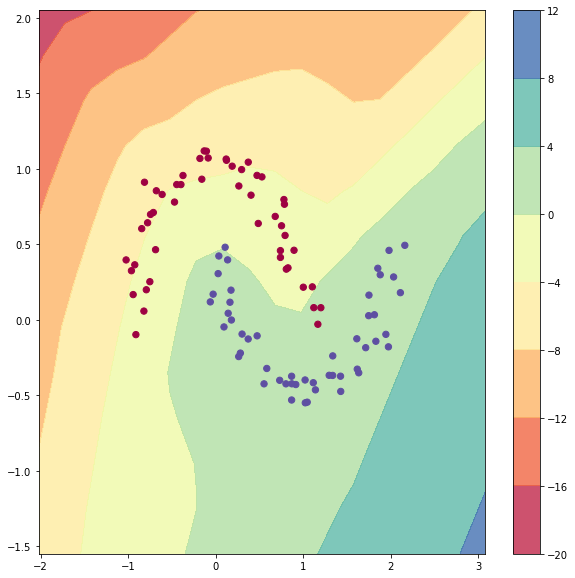

step 60 loss 0.029835117092652068, accuracy 100.0%


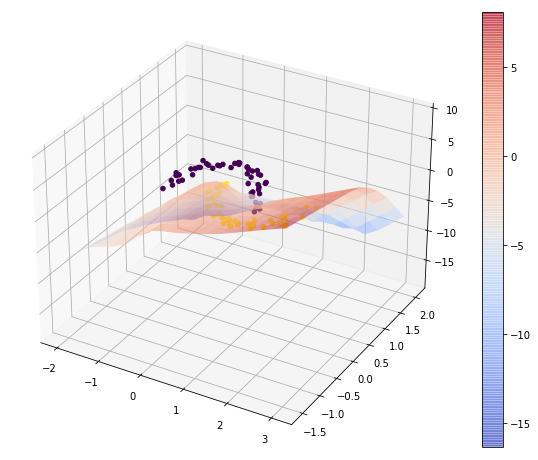

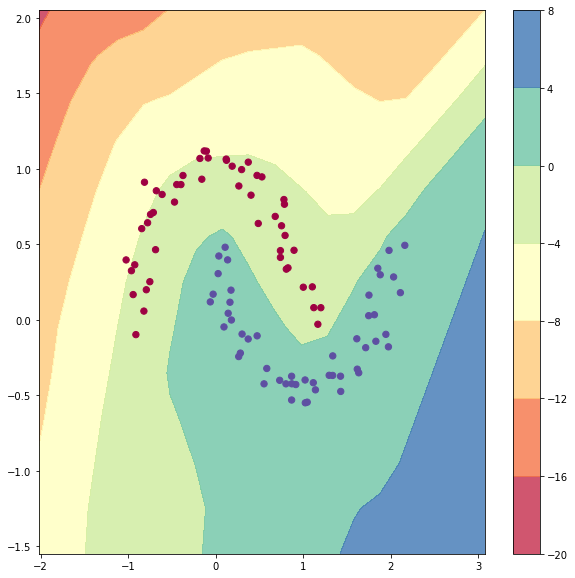

step 70 loss 0.018818686913080723, accuracy 100.0%


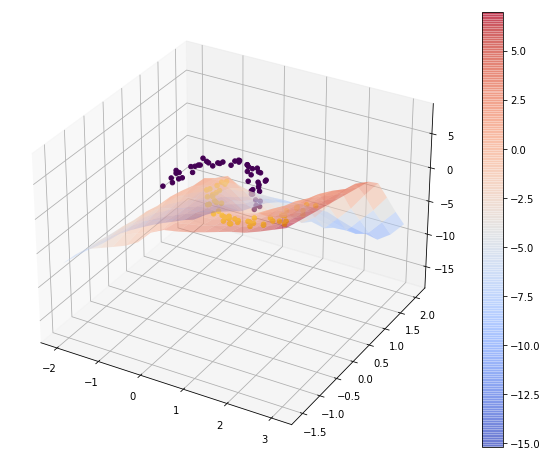

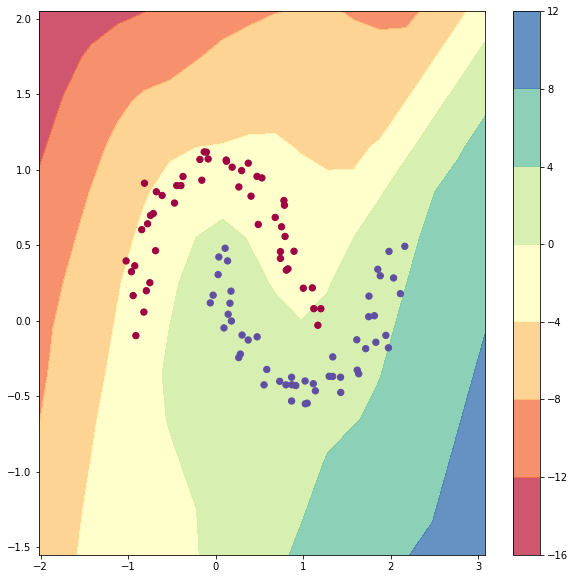

step 80 loss 0.018360384877335545, accuracy 100.0%


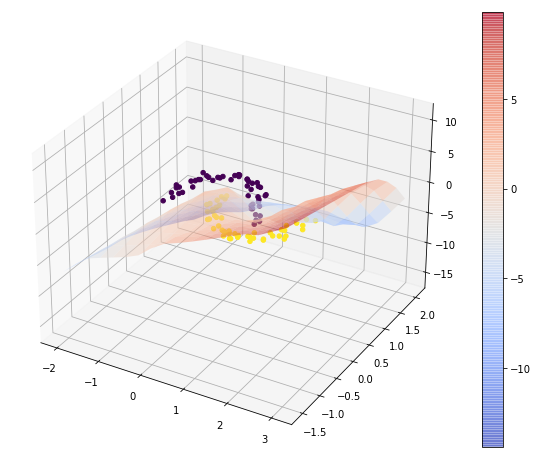

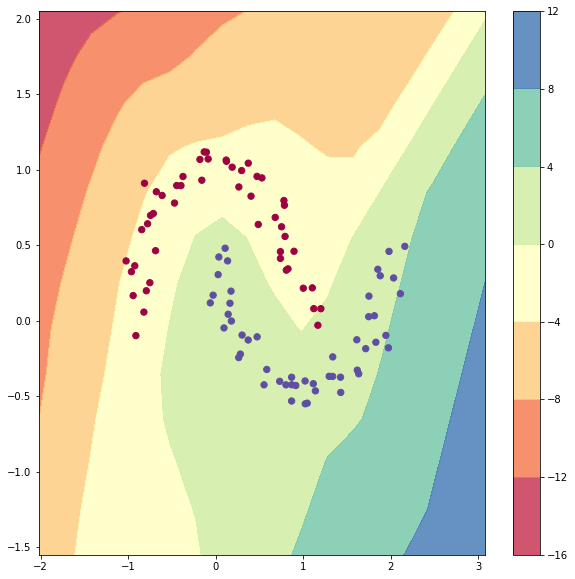

step 90 loss 0.01144340354584816, accuracy 100.0%


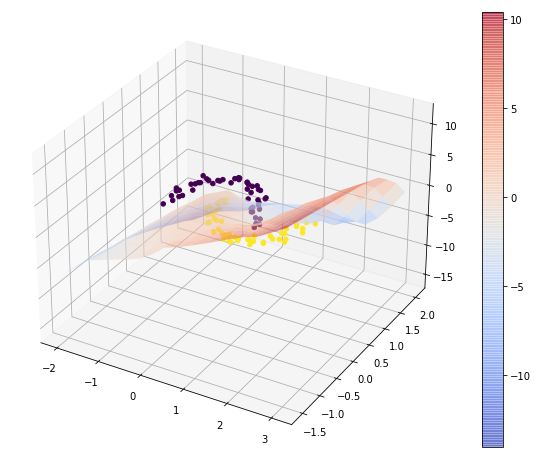

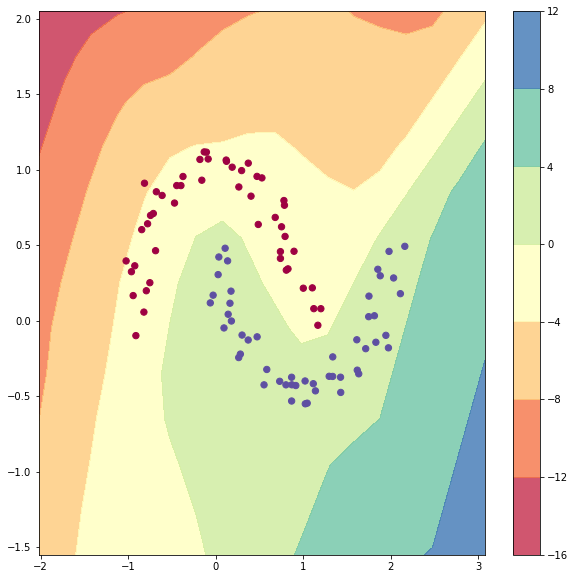

step 100 loss 0.011405475862810339, accuracy 100.0%


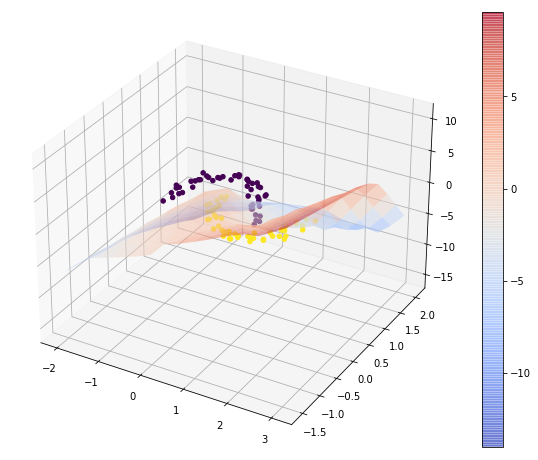

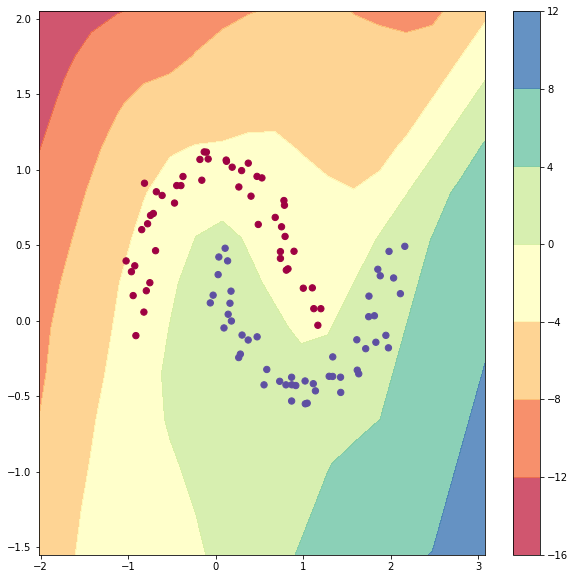

step 110 loss 0.011368492522573326, accuracy 100.0%


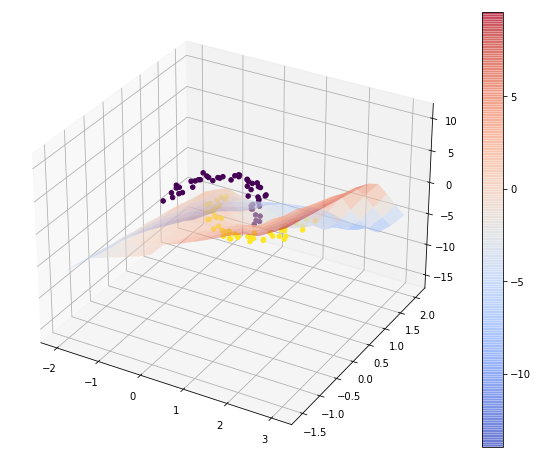

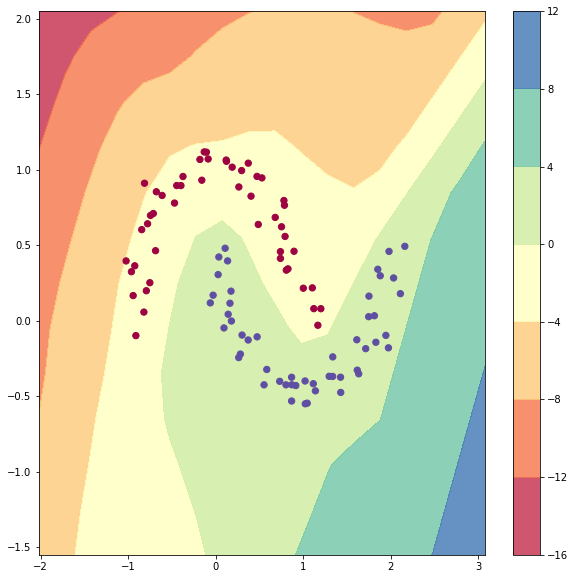

step 120 loss 0.011332445142046288, accuracy 100.0%


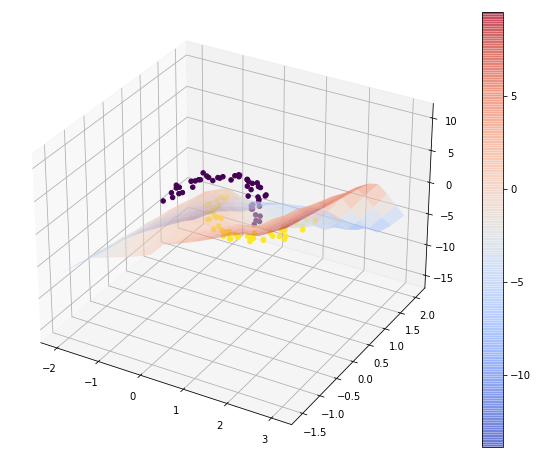

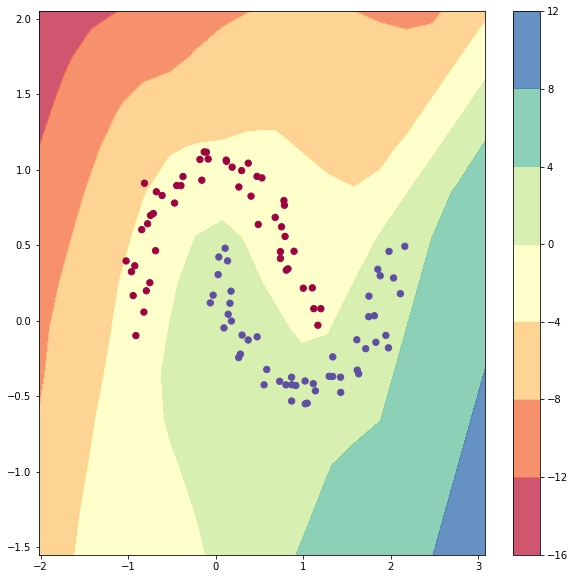

step 130 loss 0.011297325566933249, accuracy 100.0%


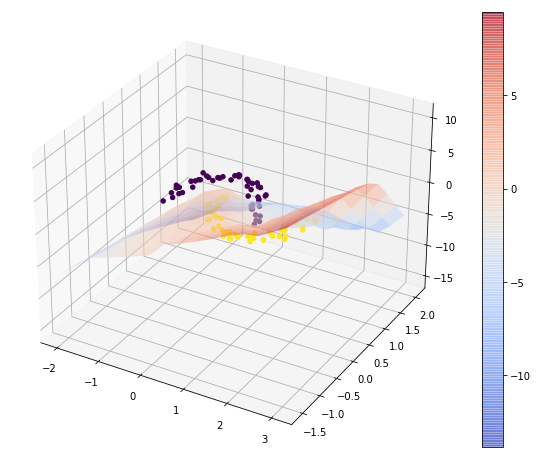

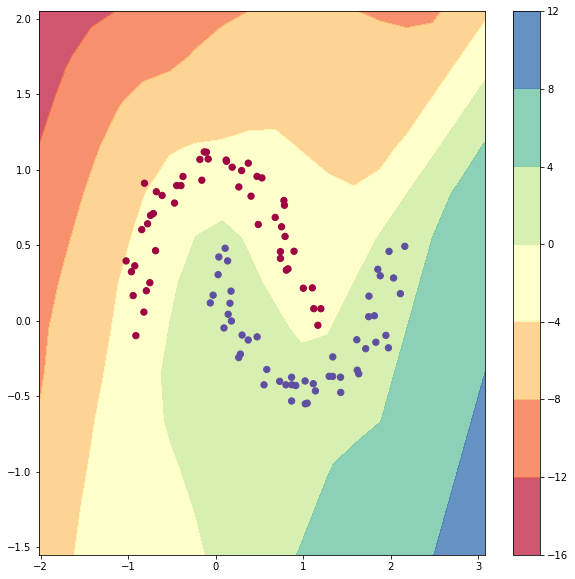

step 140 loss 0.011263125868660866, accuracy 100.0%


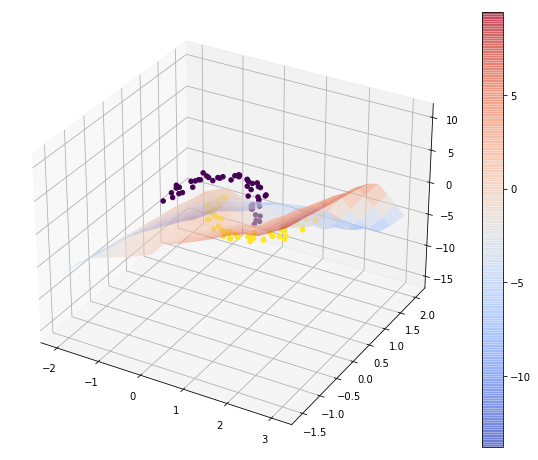

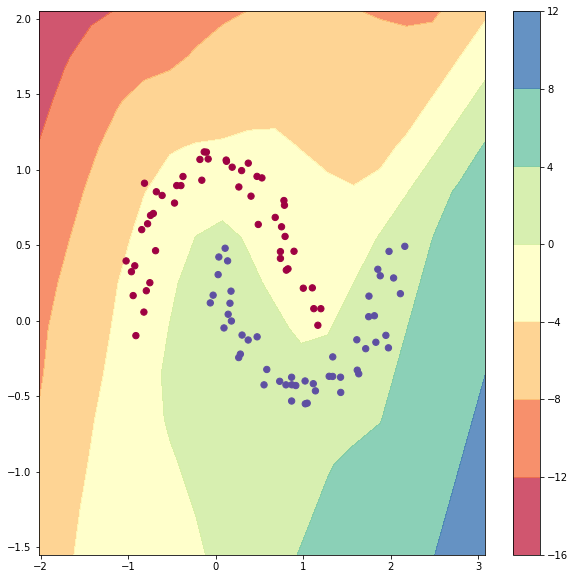

step 150 loss 0.011229838341397224, accuracy 100.0%


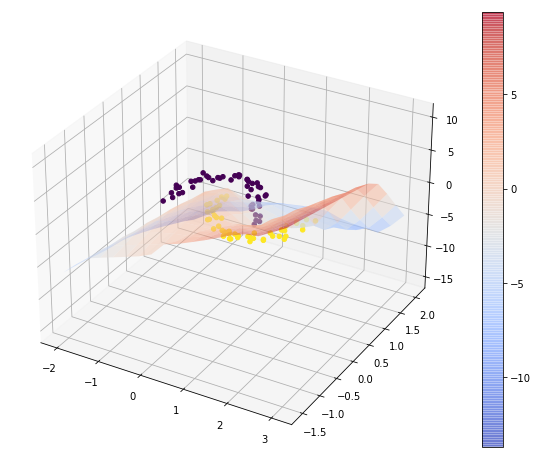

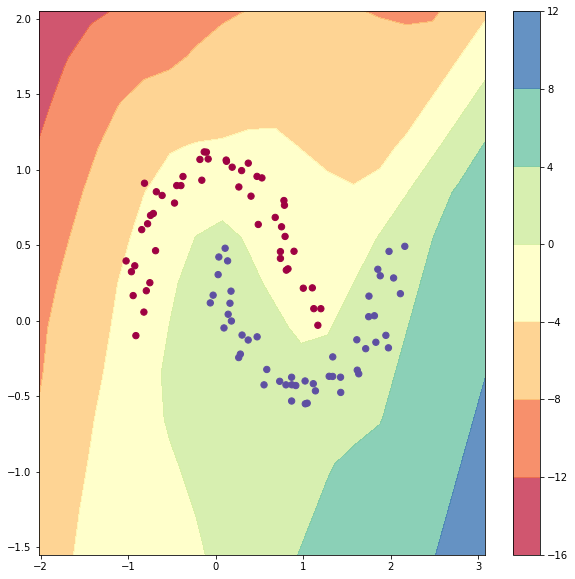

step 160 loss 0.011197455499159594, accuracy 100.0%


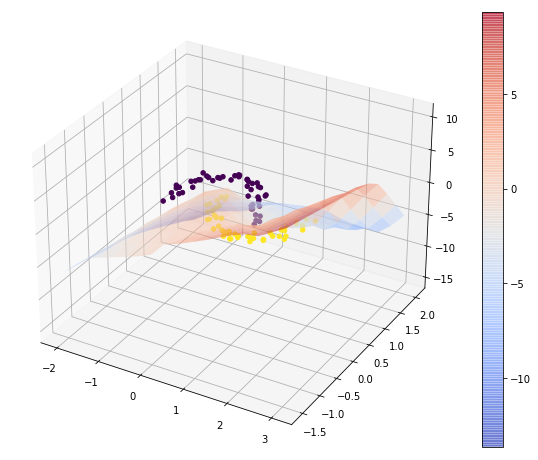

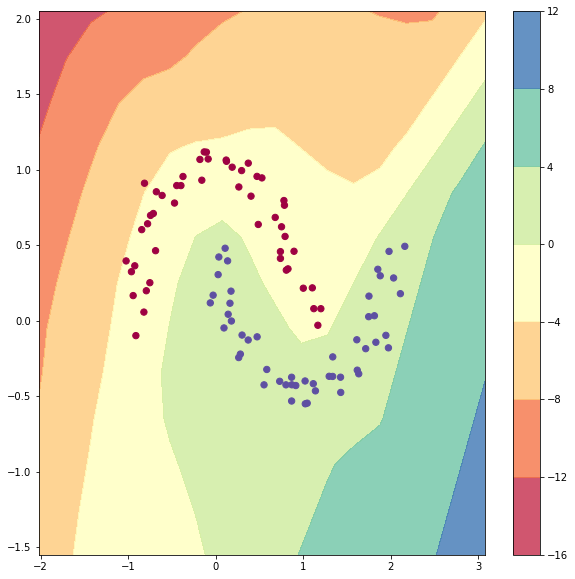

step 170 loss 0.011165970073010154, accuracy 100.0%


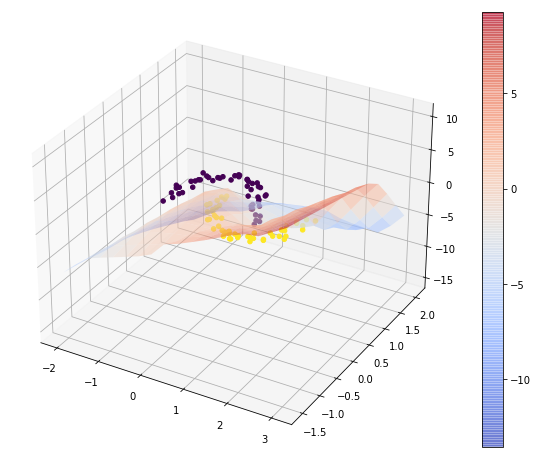

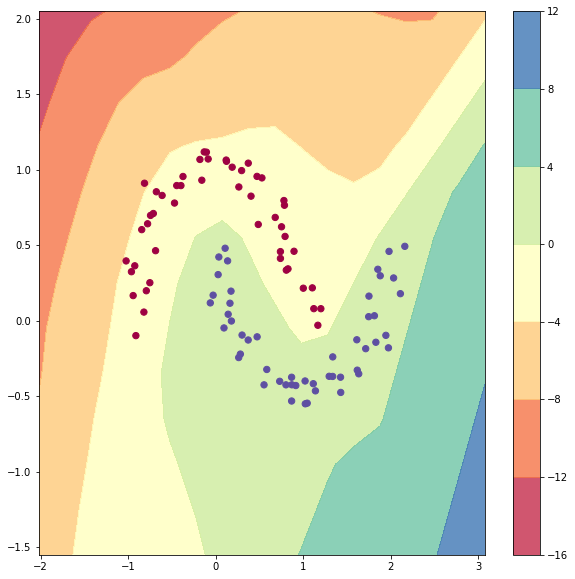

step 180 loss 0.011135375008337788, accuracy 100.0%


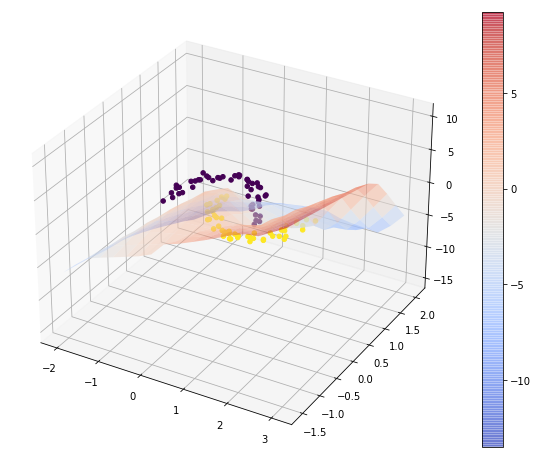

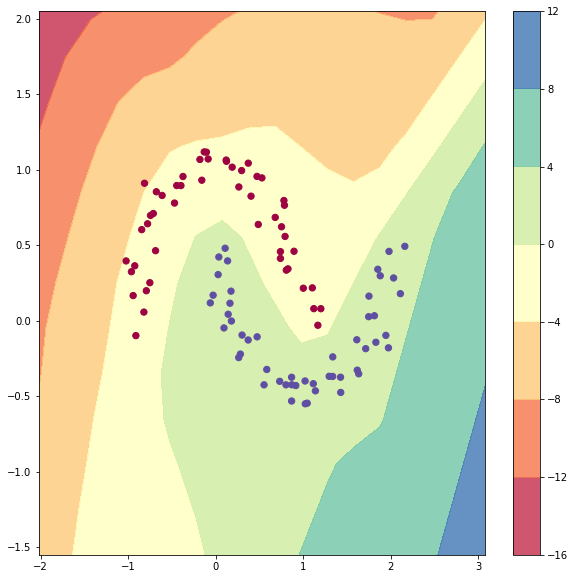

step 190 loss 0.011105663462224769, accuracy 100.0%


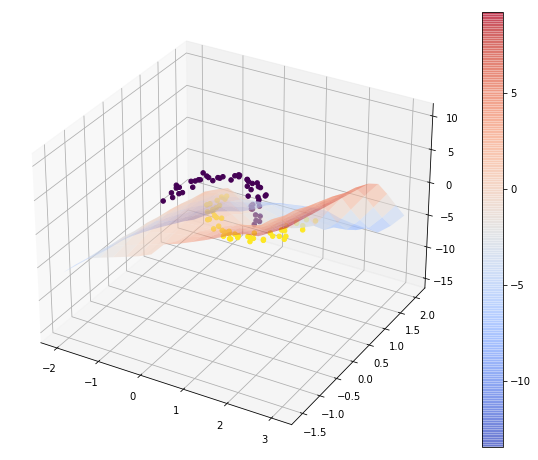

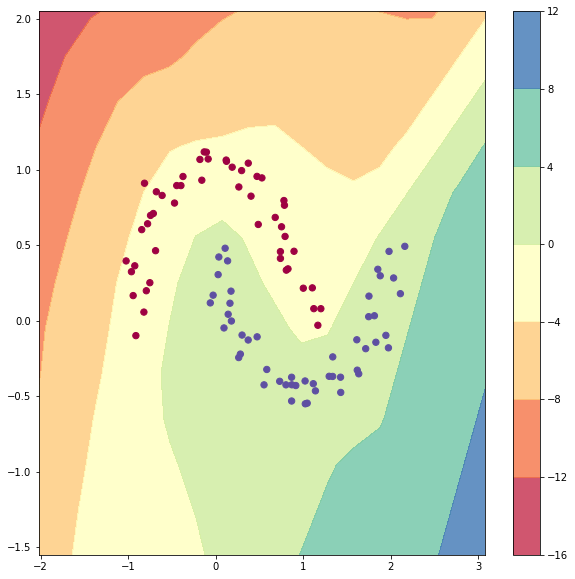

step 200 loss 0.01107682880089689, accuracy 100.0%


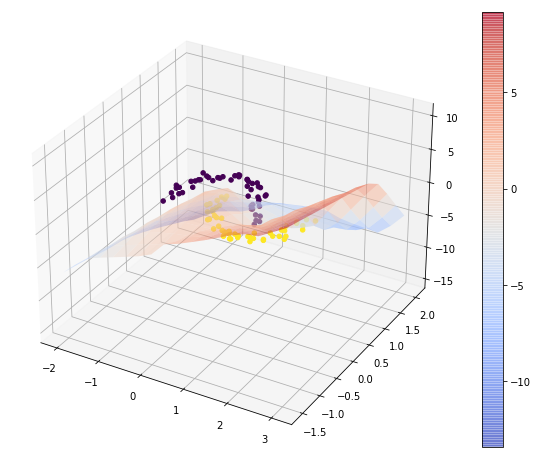

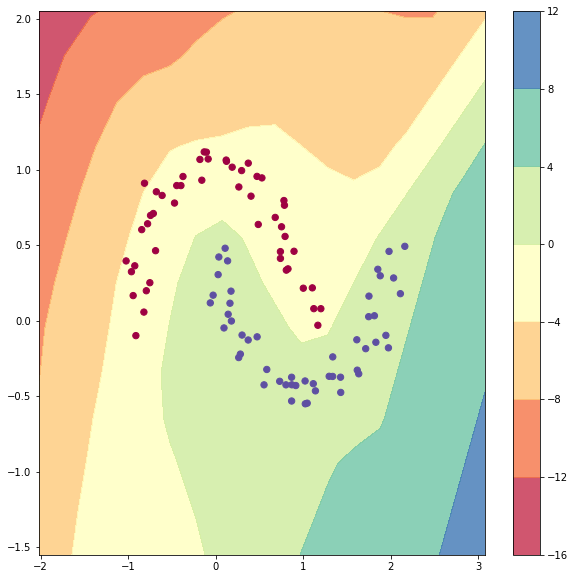

step 210 loss 0.011048864597255749, accuracy 100.0%


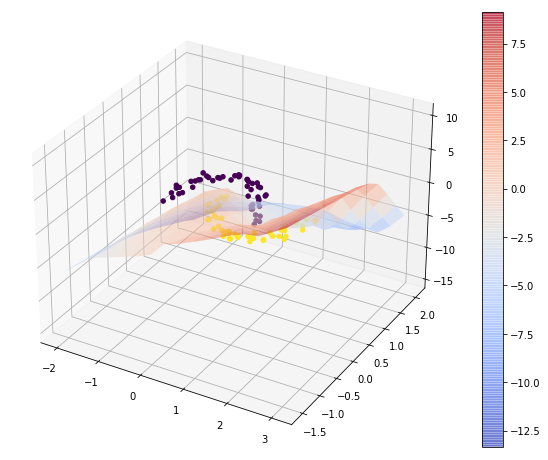

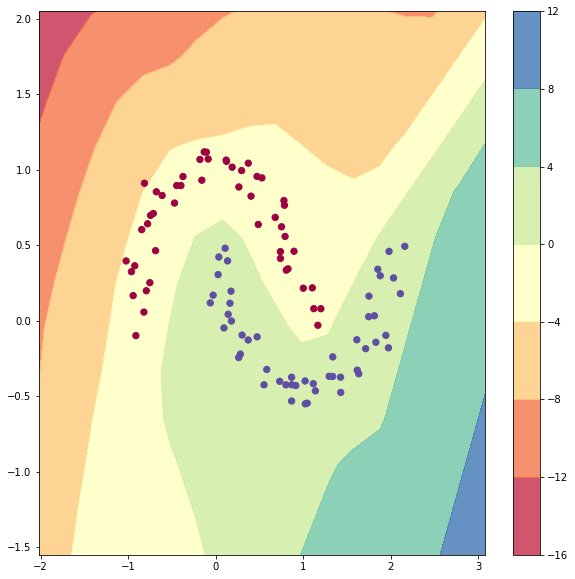

step 220 loss 0.011021764628491727, accuracy 100.0%


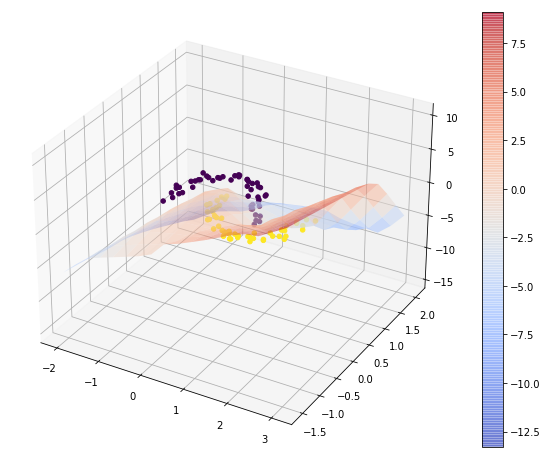

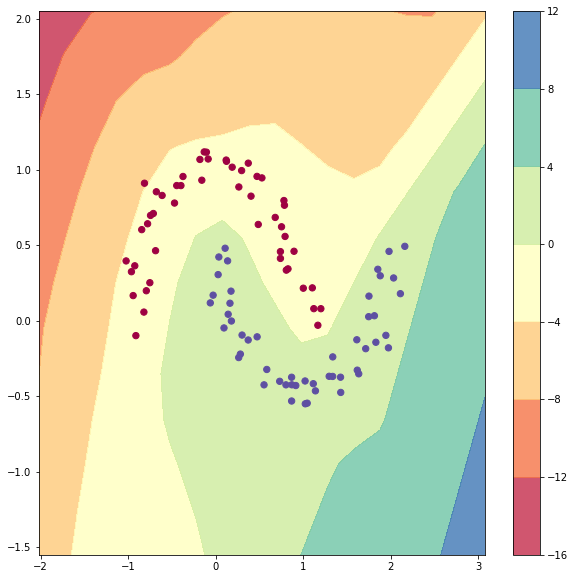

step 230 loss 0.010995522873776798, accuracy 100.0%


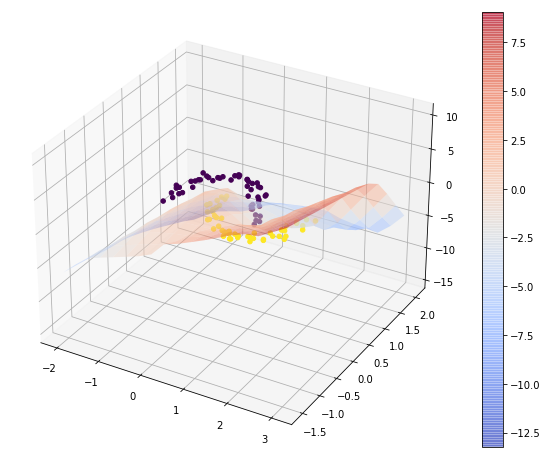

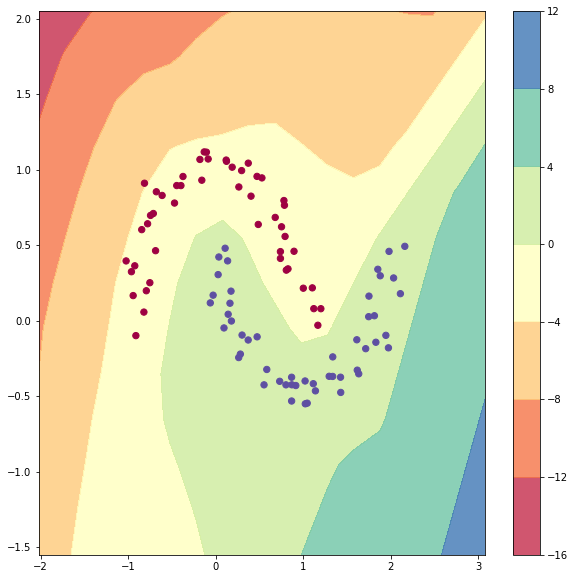

step 240 loss 0.010970133512035464, accuracy 100.0%


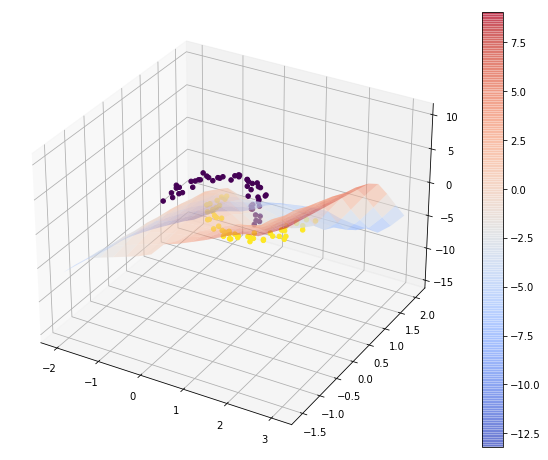

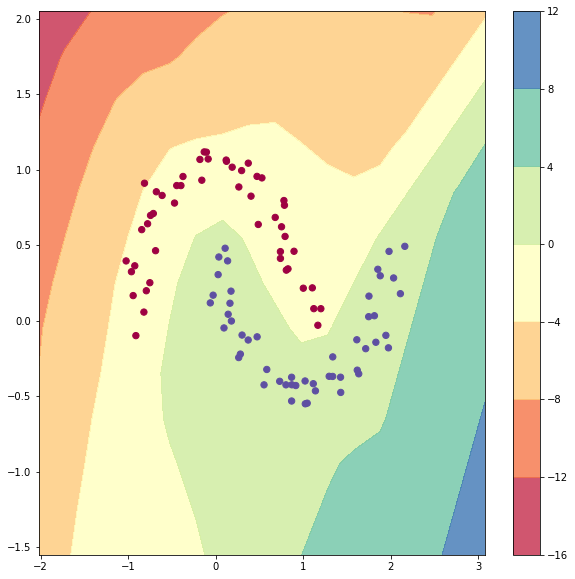

step 250 loss 0.010945590919793125, accuracy 100.0%


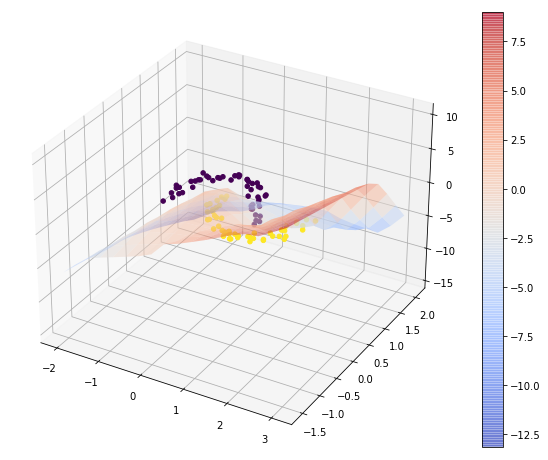

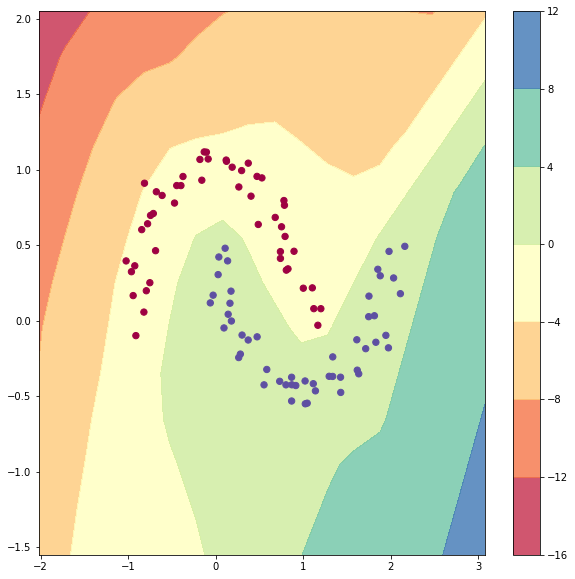

step 260 loss 0.010921889669100486, accuracy 100.0%


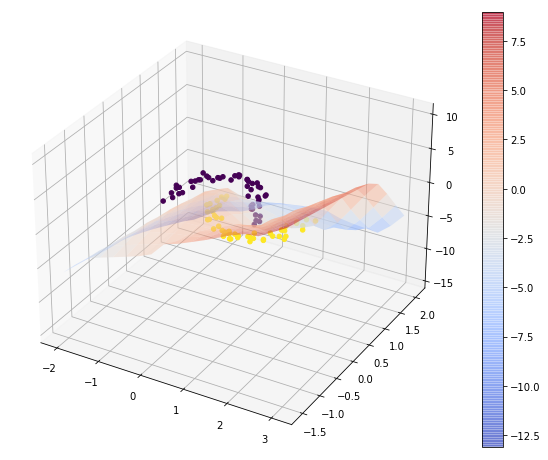

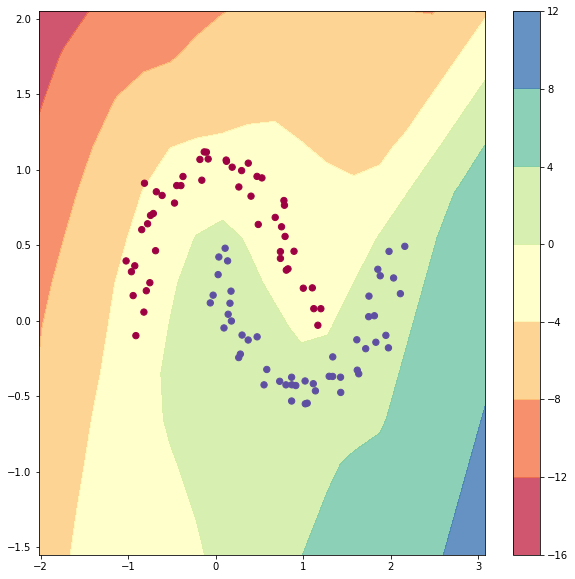

step 270 loss 0.010899024525533095, accuracy 100.0%


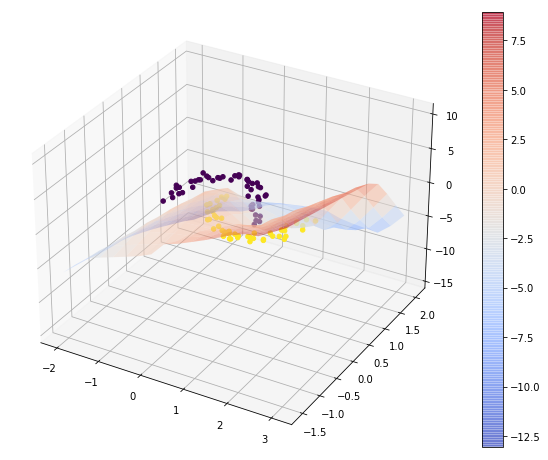

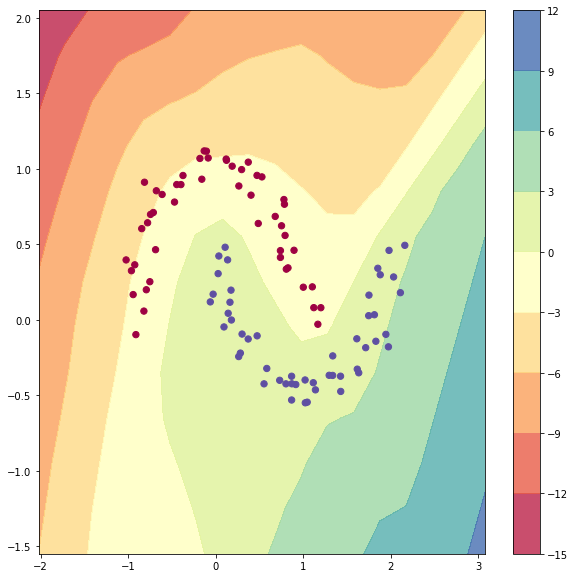

step 280 loss 0.010876990446264745, accuracy 100.0%


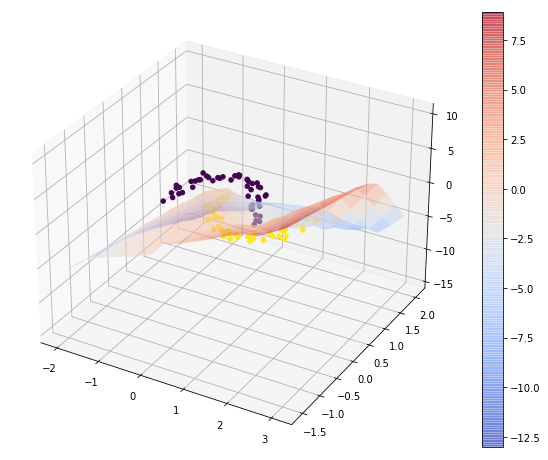

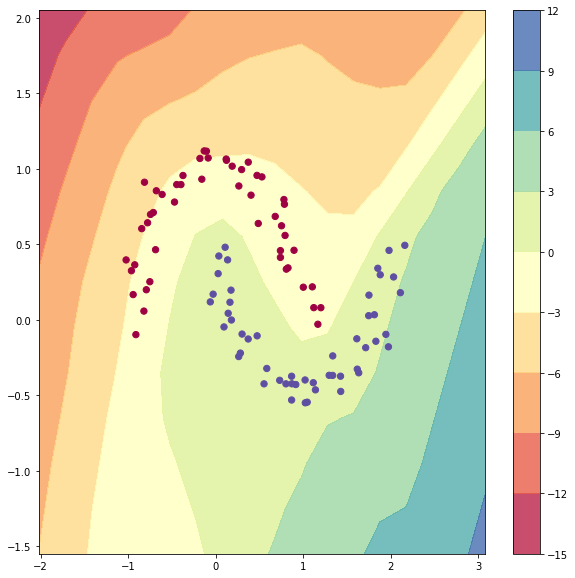

step 290 loss 0.01085578257821416, accuracy 100.0%


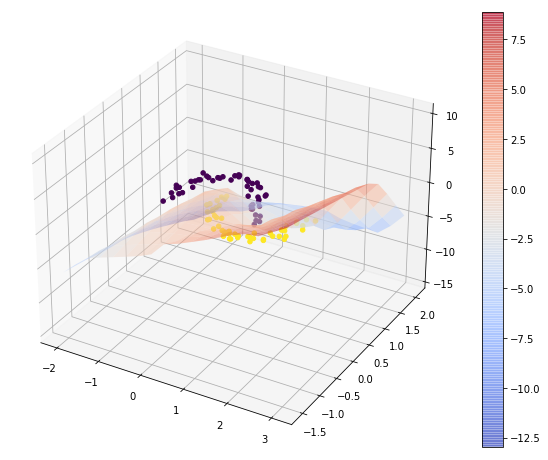

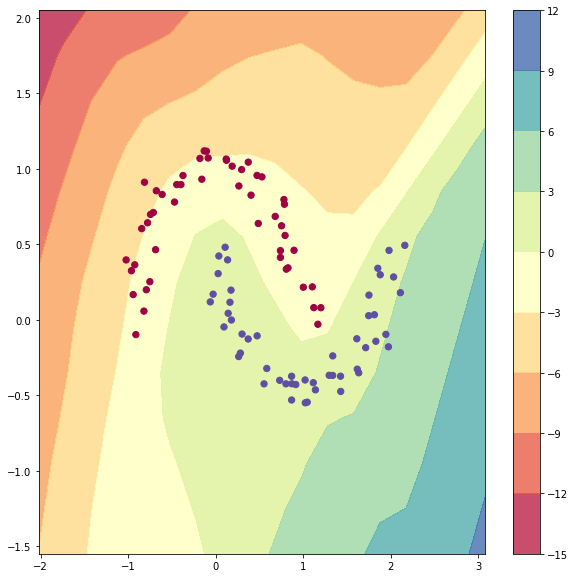

step 300 loss 0.010835396256263436, accuracy 100.0%


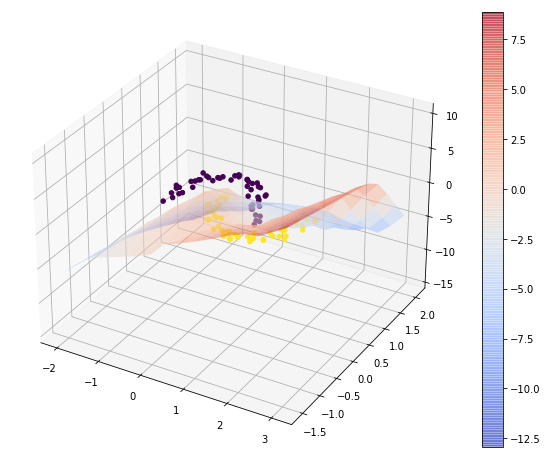

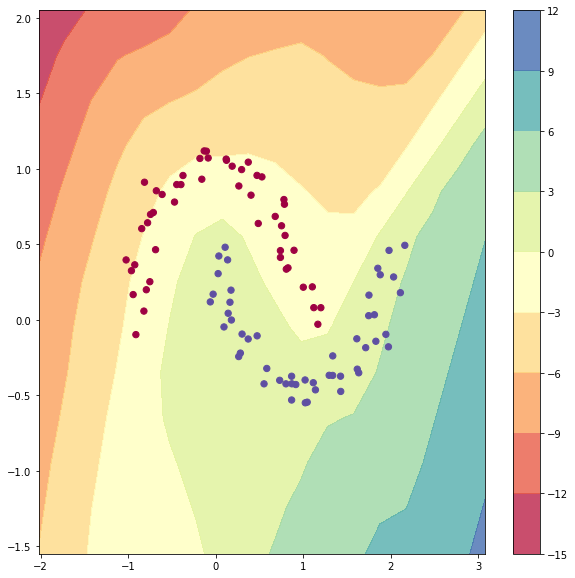

step 310 loss 0.010815827001547984, accuracy 100.0%


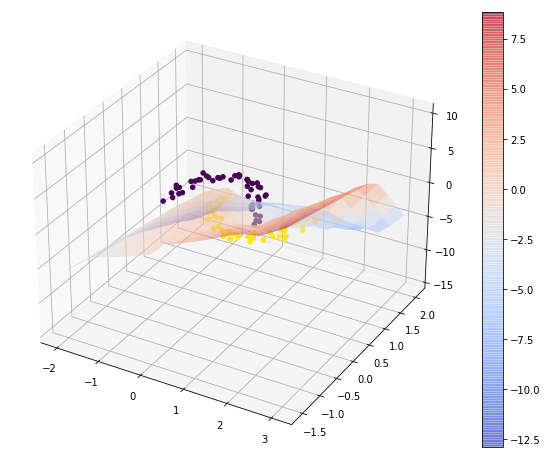

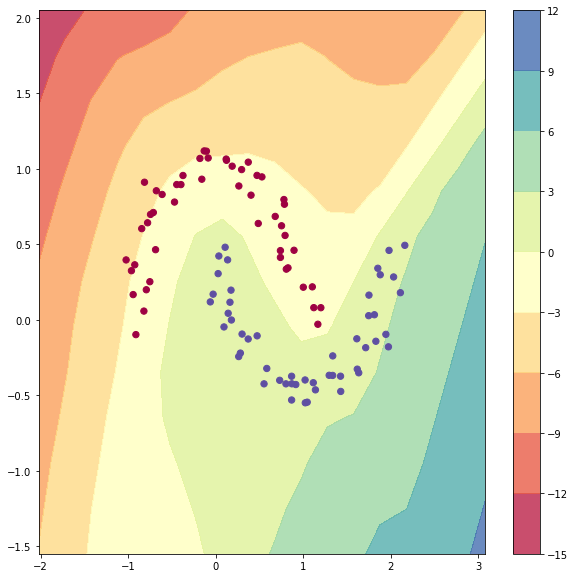

step 320 loss 0.010797070519816435, accuracy 100.0%


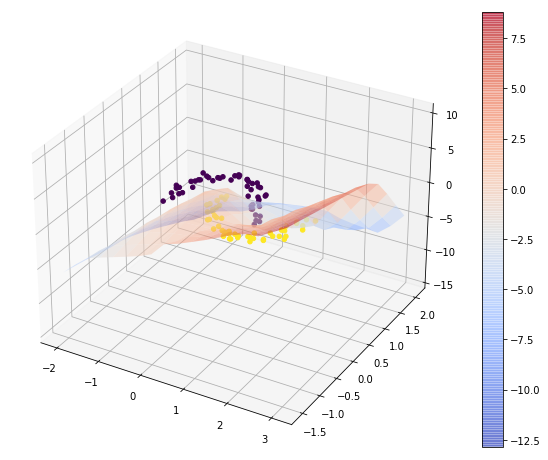

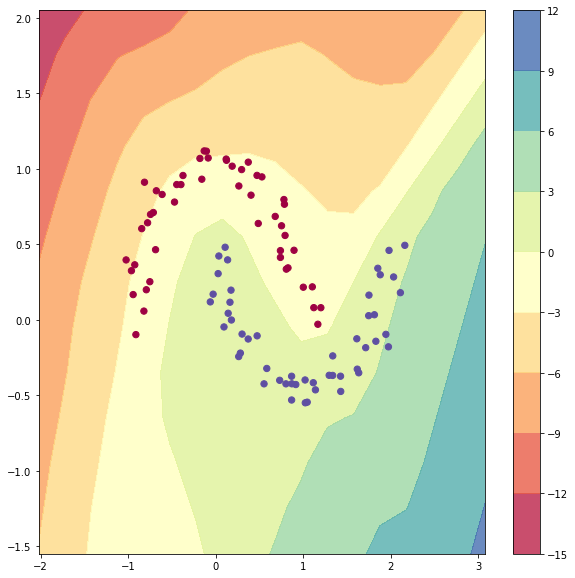

step 330 loss 0.010779122699860238, accuracy 100.0%


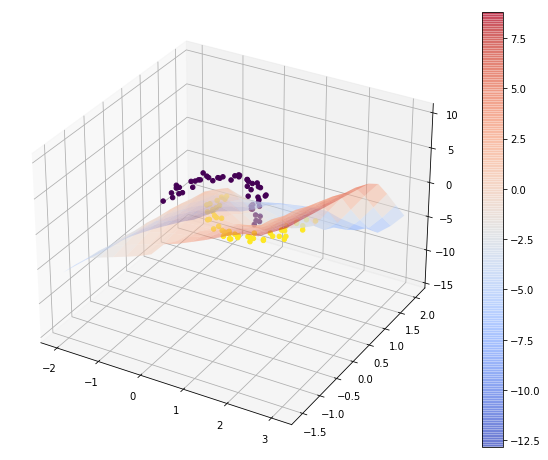

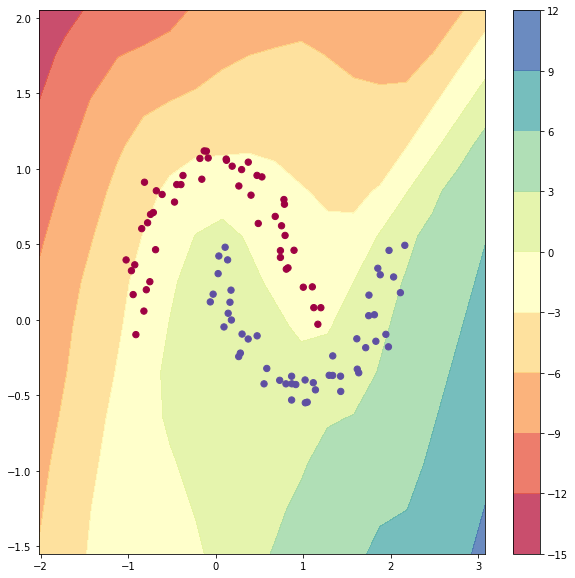

step 340 loss 0.010761979612011816, accuracy 100.0%


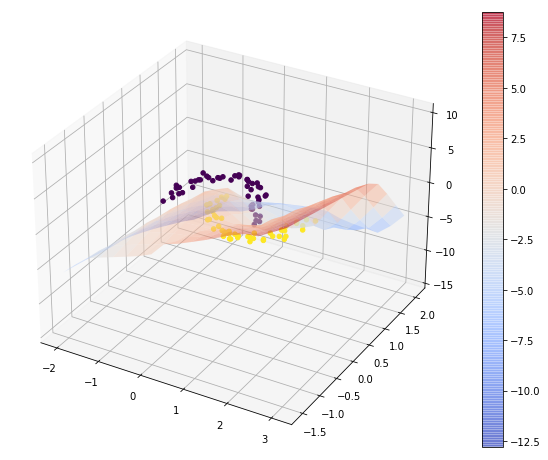

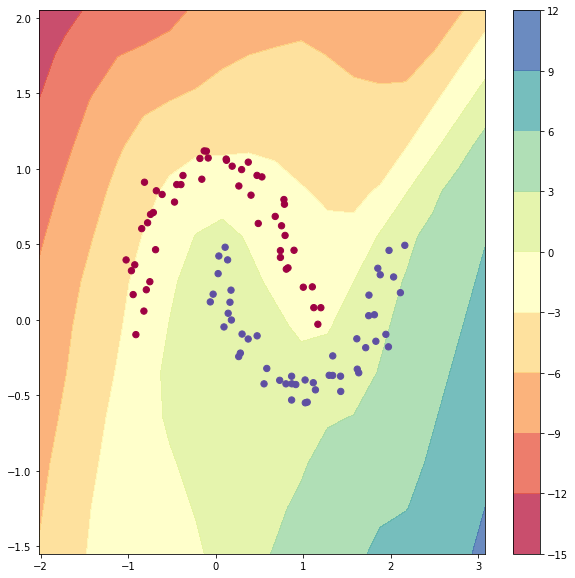

step 350 loss 0.01074563750671043, accuracy 100.0%


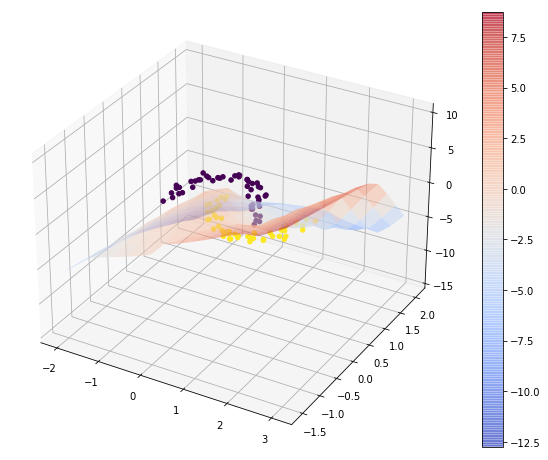

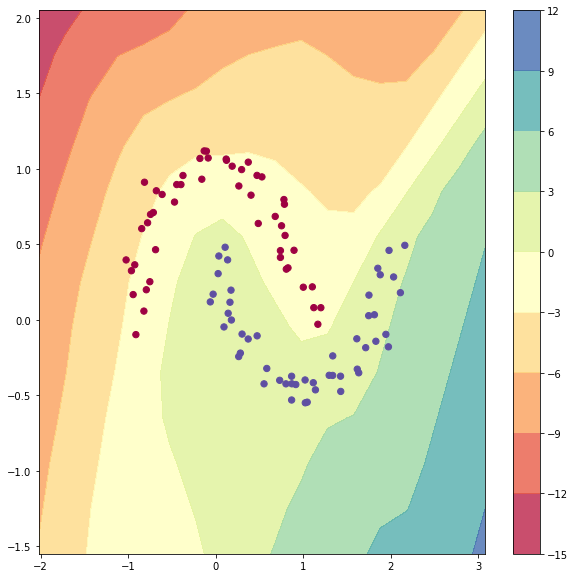

step 360 loss 0.01073009281313551, accuracy 100.0%


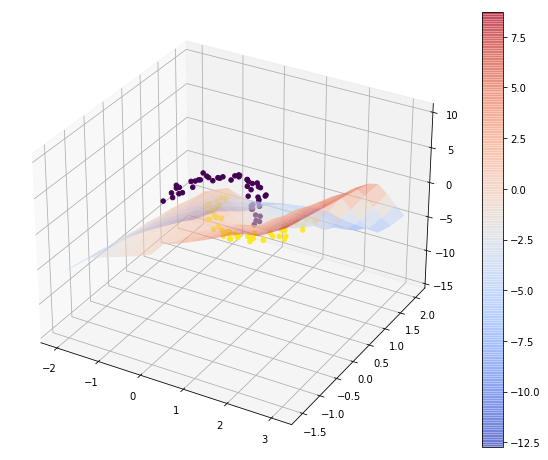

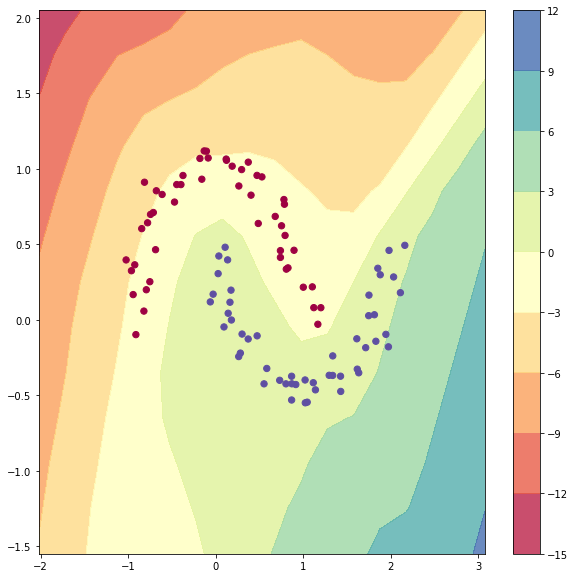

step 370 loss 0.010719748441323446, accuracy 100.0%


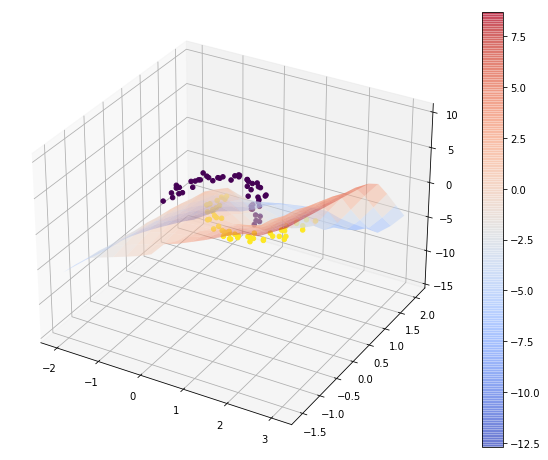

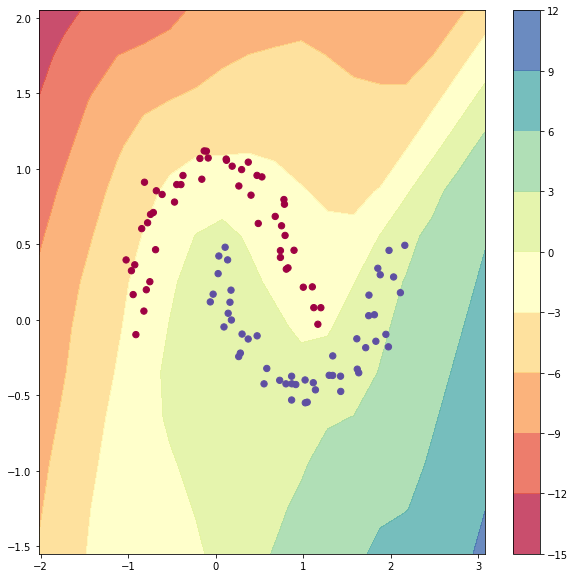

step 380 loss 0.010705782826761824, accuracy 100.0%


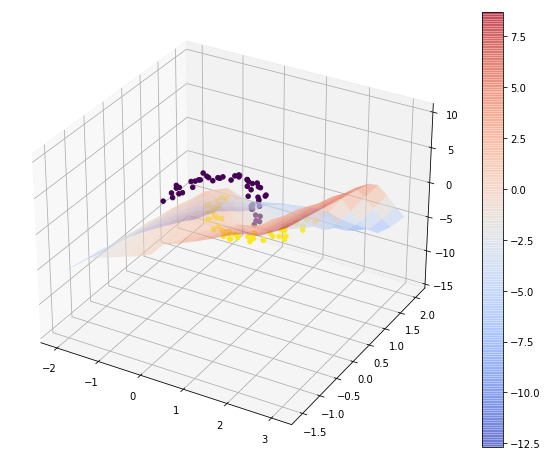

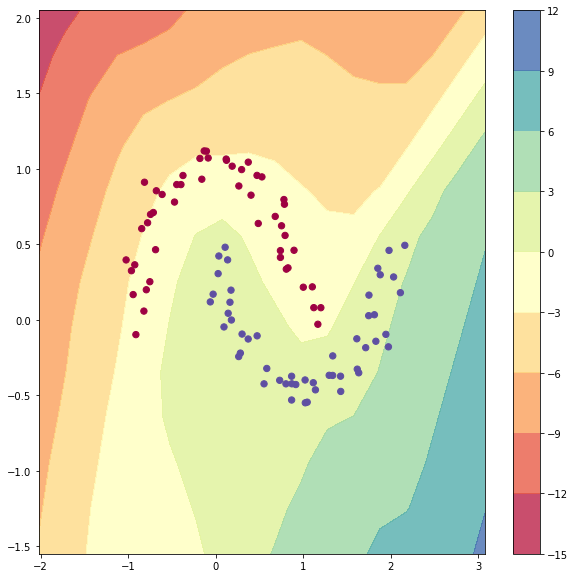

step 390 loss 0.010692605295167298, accuracy 100.0%


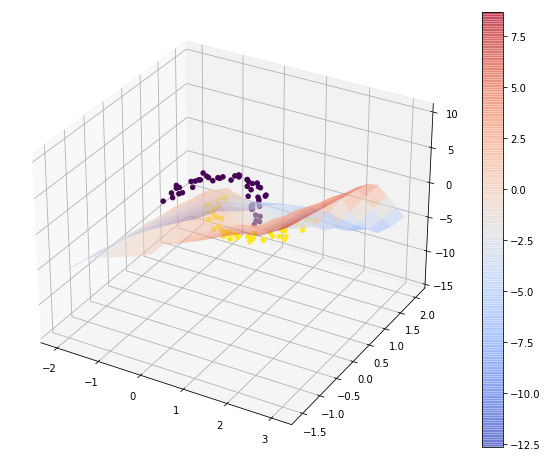

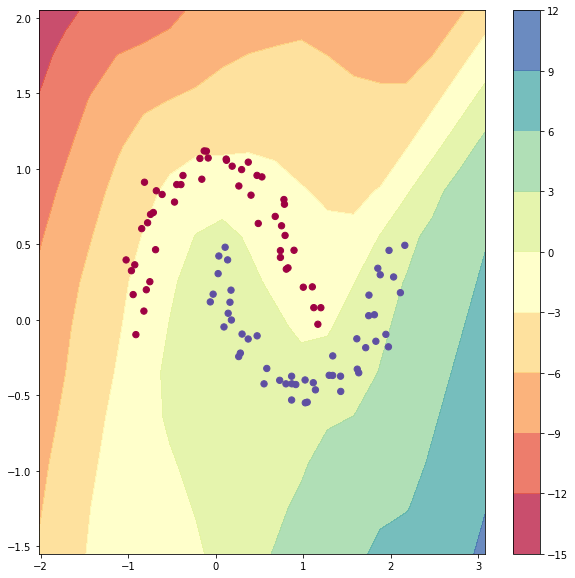

step 400 loss 0.010680212977150648, accuracy 100.0%


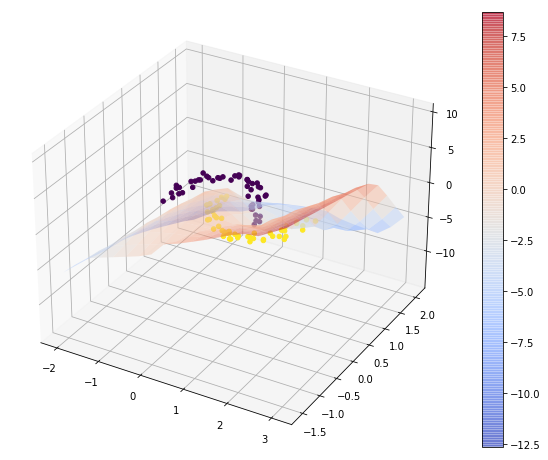

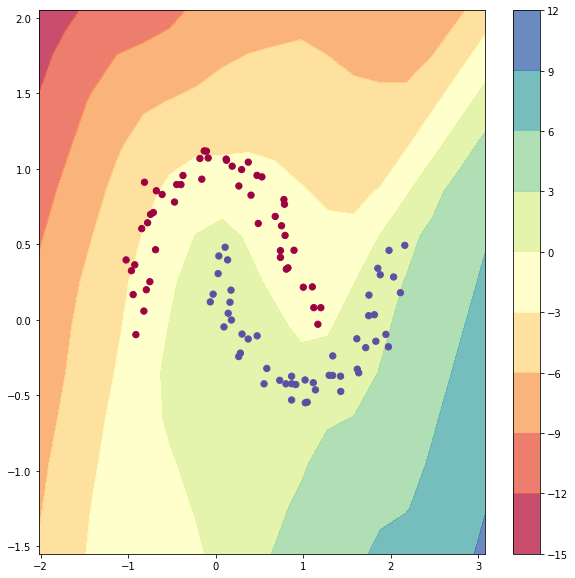

step 410 loss 0.010668603176283363, accuracy 100.0%


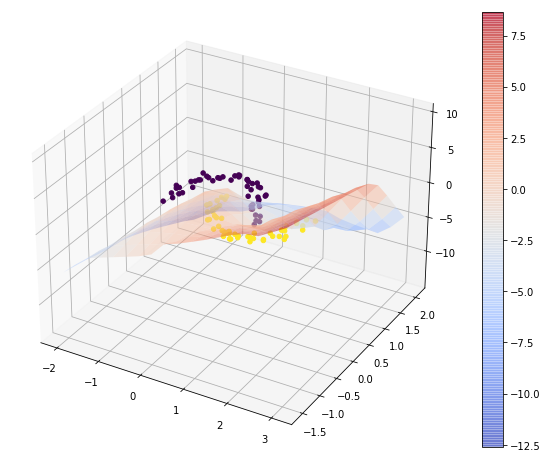

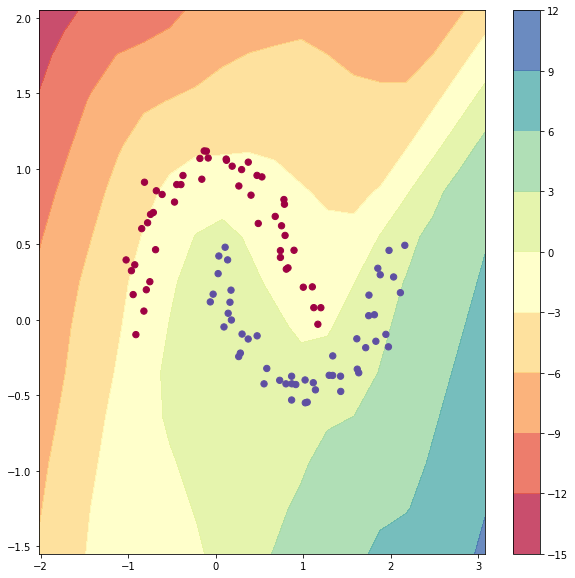

step 420 loss 0.010657773368119834, accuracy 100.0%


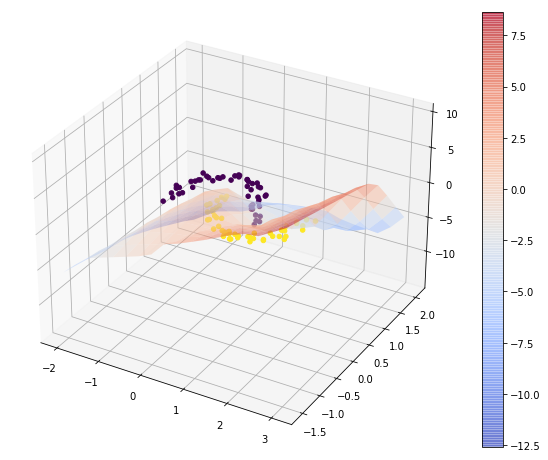

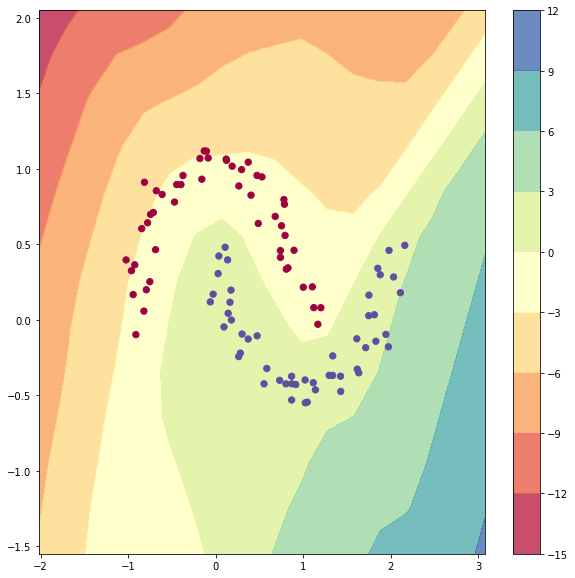

step 430 loss 0.01064772119928237, accuracy 100.0%


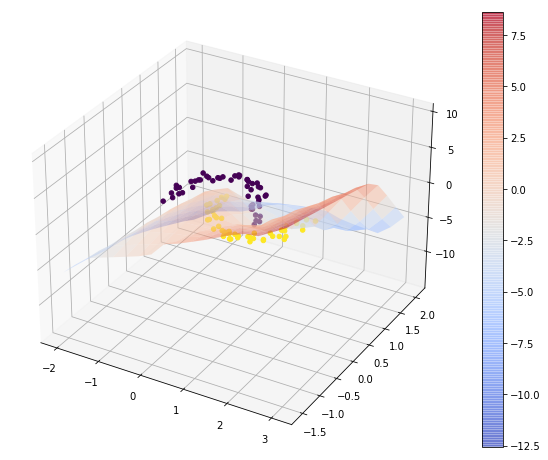

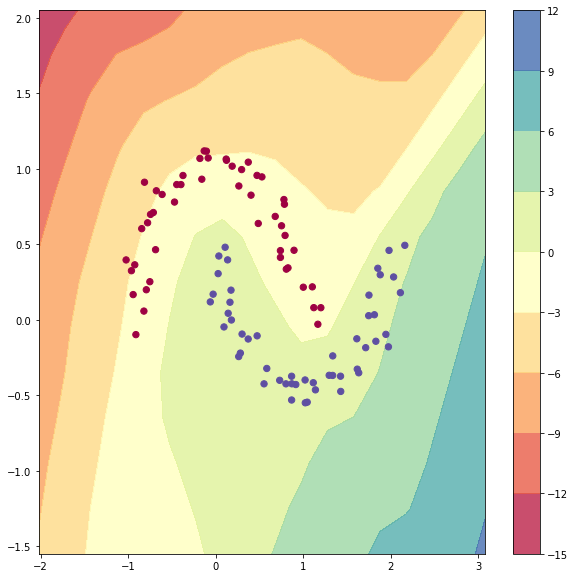

step 440 loss 0.010638444486608906, accuracy 100.0%


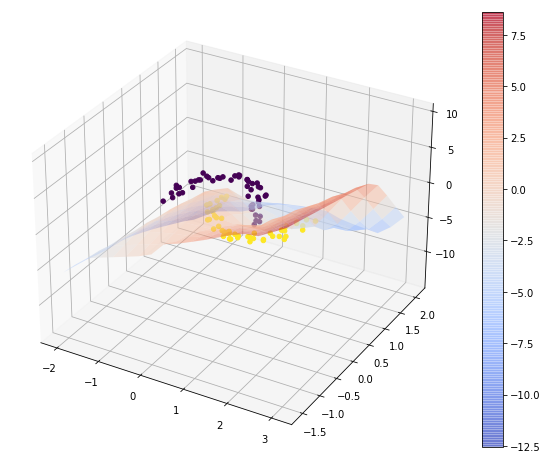

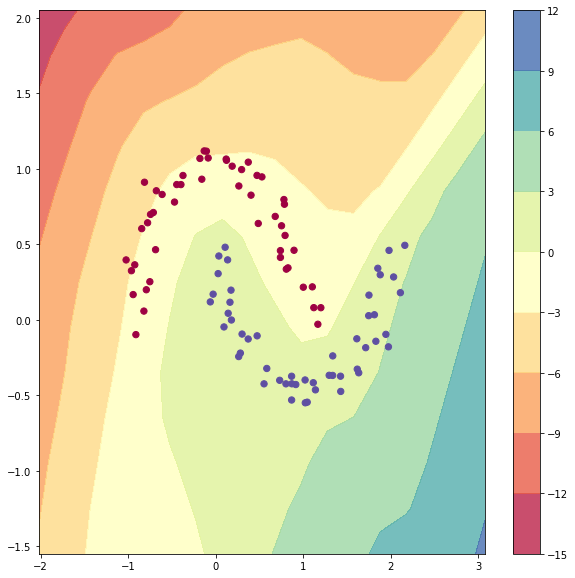

step 450 loss 0.010629941216362711, accuracy 100.0%


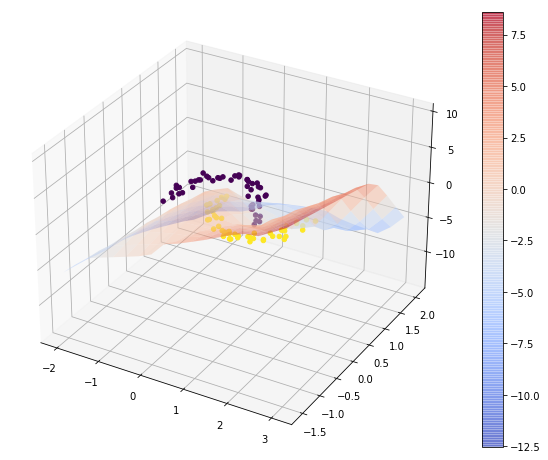

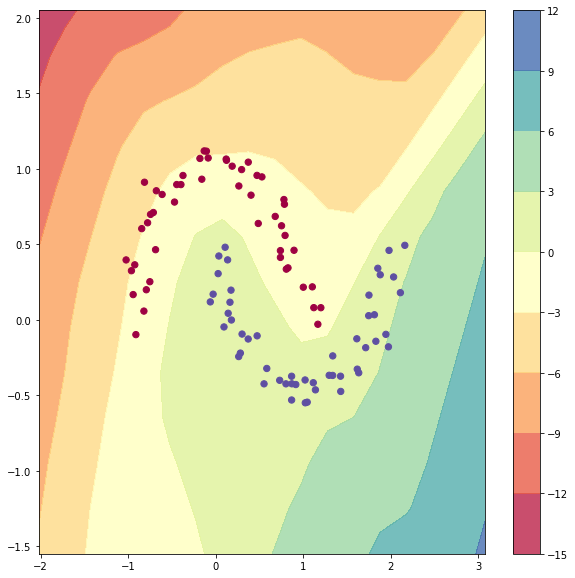

step 460 loss 0.010622209543503769, accuracy 100.0%


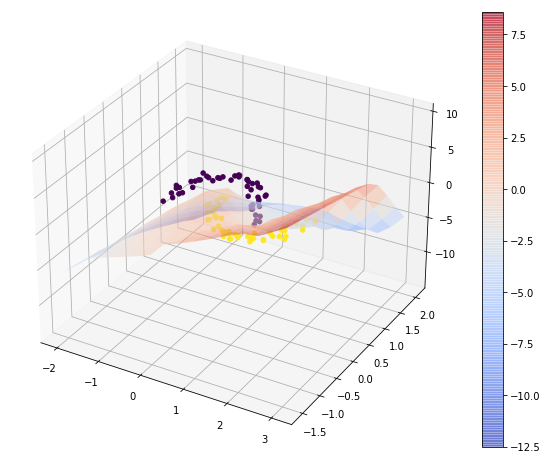

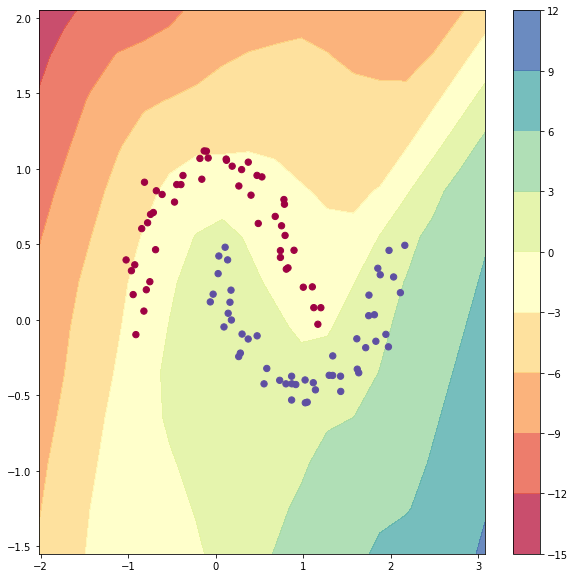

step 470 loss 0.01061524779102159, accuracy 100.0%


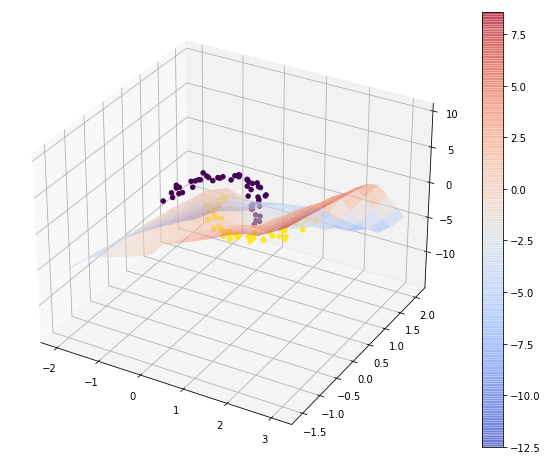

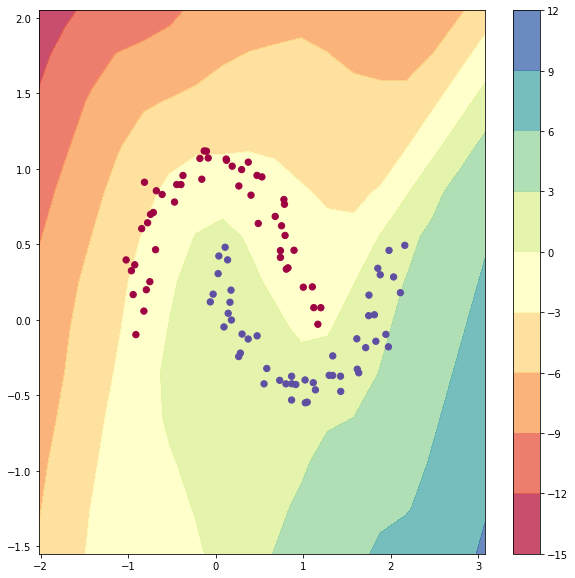

step 480 loss 0.010609054449328865, accuracy 100.0%


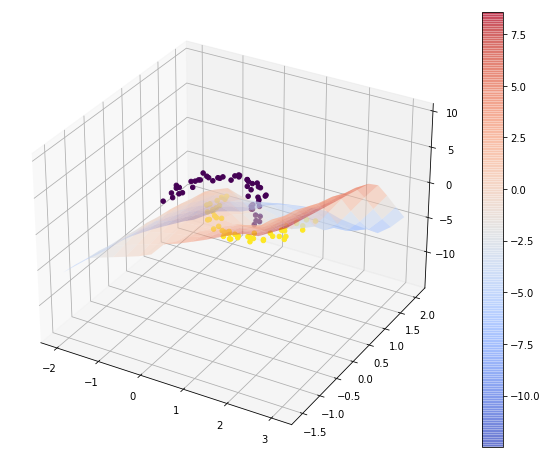

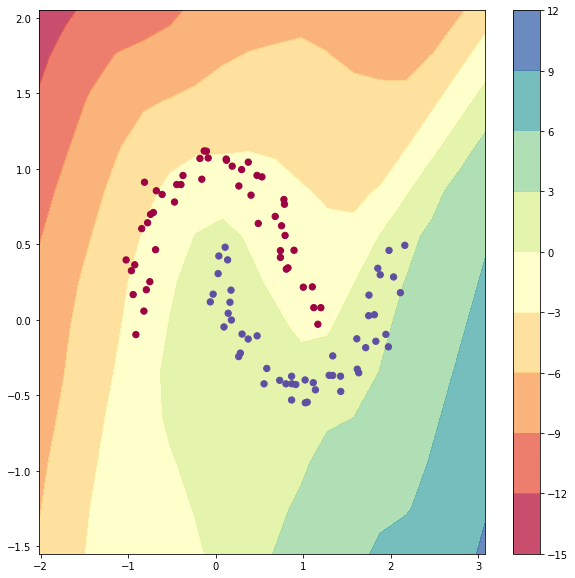

step 490 loss 0.010603628175715994, accuracy 100.0%


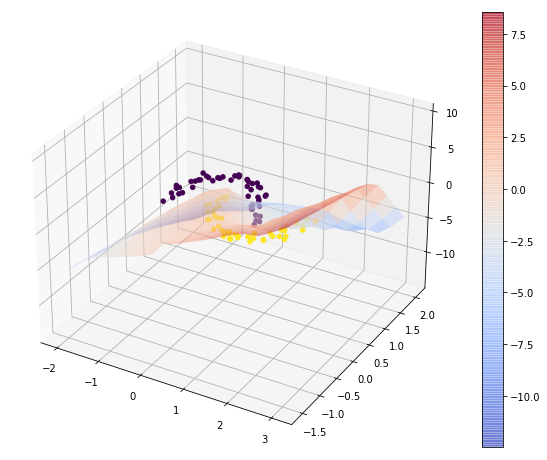

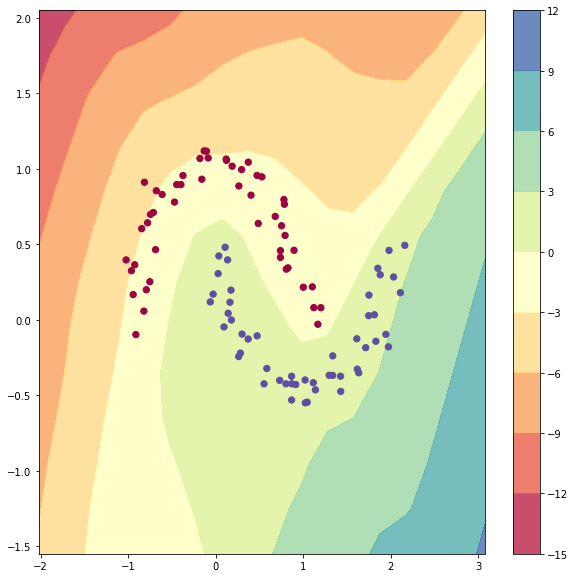

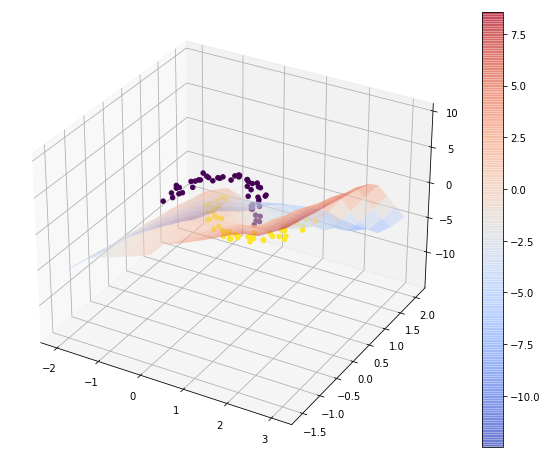

In [109]:
# optimization
stats = []
n_iter = 500
for k in range(n_iter):
    
    # forward
    total_loss, acc = loss()
    
    stats.append([total_loss.data, acc])
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/n_iter
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 10 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")
        visualize(X, y)


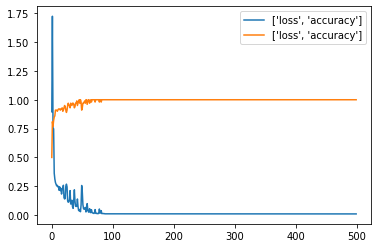

In [110]:
plt.plot(stats, label=["loss","accuracy"])
plt.legend()
plt.show()

(-1.548639298268643, 1.951360701731357)

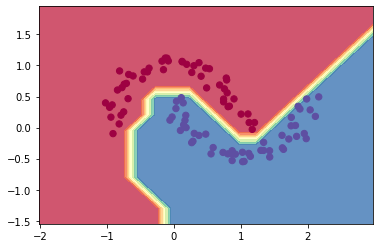

In [111]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
